# Outcomes

By the end of this notebook, you will be able to...
* Define new functions in Python.
* Create a dictionary in Python.
* Generate plots of scalar fields and vector fields.

# Visualizations Beyond the Scatter Plot

Another important use of computation in physics is **visualization**, the ability to display quantitative data in a form that is easy make sense of. Your students are likely familiar with the scatter plot. On the surface, a scatter plot is a visual record of data collected in an experiment. But the purpose of a scatter plot is to make sense of the relationship between two variables: Are they correlated or uncorrelated? If they're correlated, do they have a direct or inverse relationship? Why type of equation might describe their relationship? These questions are much easier to answer with a scatter plot than with a table of numerical values.

Python libraries like `matplotlib` offer the ability to create a diversity of visualizations, not just scatter plots, including those your students are likely to need to create throughout their careers: 

Bubble plots

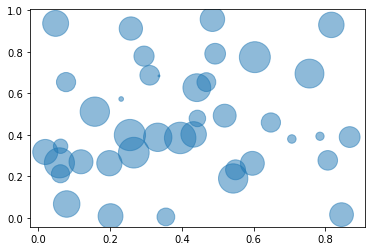

Sankey plots:

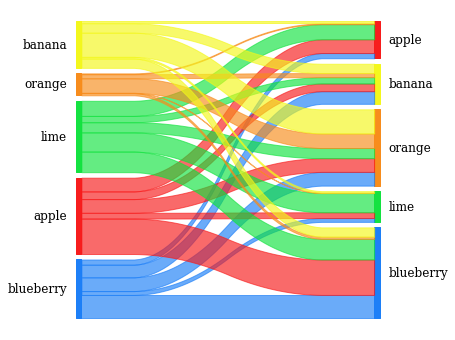

Countor plots

![image](https://matplotlib.org/stable/_images/sphx_glr_contour_demo_001.png)

Heat maps

![image](https://matplotlib.org/stable/_images/sphx_glr_image_annotated_heatmap_001.png)

Network diagrams

![image](https://miro.medium.com/max/1400/1*rmq7bd3GFjcwfXtkrBQaPQ.png)


In this Module, we'll learn how to use **quiver plots** to visualize electric fields.

# Translating the electric field into code

Evaluating the electric field created by a point charge requires a lot of information. We need to know...
* The **charge** $q$ of the point charge.
* The **coordinates** of the point charge. Let's stick with two dimensions, meaning we need $x_{\textrm{charge}}$ and $y_{\textrm{charge}}$.
* The **coordinates** of where we're measuring the field. In two dimensions, this means we need $x_{\textrm{field}}$ and $y_{\textrm{field}}$. To properly visualize the electric field pattern, we'll need many pairs of these coordinates: $(x_{\textrm{field},1}, y_{\textrm{field},1}), (x_{\textrm{field},2}, y_{\textrm{field},2}), (x_{\textrm{field},3}, y_{\textrm{field},3}), \ldots$
* The **components** $E_x, E_y$ of the electric field $\vec{E}$ at each of the field coordinates: $E_x(x_{\textrm{field},1}, y_{\textrm{field},1}), E_y(x_{\textrm{field},1}, y_{\textrm{field},1}), E_x(x_{\textrm{field},2}, y_{\textrm{field},2}), E_y(x_{\textrm{field},2}, y_{\textrm{field},2}), \ldots$

We'll use two types of data structure in Python to track this information.

## A dictionary for the point charge

For the point charge, we'll set up a **dictionary**. A dictionary is a collection of values all placed under a common variable, each with its own **key**. We'll use these keys to reference the point charge's properties: $q, x_{\textrm{charge}},$ and $y_{\textrm{charge}}$. Dictionaries are enclosed by `{}` and use a `:` to link key and value. For example, the code 

`ThisCharge = { 'q':-1, 'x':0, 'y':1 }`

creates a point charge with $q = -1$, $x_{\textrm{charge}}=0,$ and $y_{\textrm{charge}}=1$. Any time we reference `ThisCharge`, Python can access any of these values using `ThisCharge['q']`, `ThisCharge['x']`, and `ThisCharge['y']`. This type of key-referencing allows us to understand what properties of `ThisCharge` are being referenced.

In the code cell below, create a `PointCharge` dictionary with $q = +1$, $x_{\textrm{charge}}=-3,$ and $y_{\textrm{charge}}=0$.

## A meshgrid for the field points

We'll want to view the electric field at many points, likely along a grid. For example, if we wanted to use a square grid running from $x=-2$ to $x=+2$ and from $y=-2$ to $y=+2$ in steps of $1$ unit in each direciton, we'd have points


\begin{eqnarray}
(-2,2), & (-1,2), & (0,2), & (1,2), & (2,2), \\
(-2,1), & (-1,1), & (0,1), & (1,1), & (2,1), \\
(-2,0), & (-1,0), & (0,0), & (1,0), & (2,0), \\
(-2,-1), & (-1,-1), & (0,-1), & (1,-1), & (2,-1), \\
(-2,-2), & (-1,-2), & (0,-2), & (1,-2), & (2,-2)
\end{eqnarray}

This is a lot to keep track of! The `numpy` library has a nice method called `np.meshgrid()` to create a grid like this. The setup looks like

`X,Y = np.meshgrid(xlist,ylist)`

where `xlist = [x1,x2,x3,...]` is all the $x$ coordinates you want to use and `ylist = [y1,y2,y3,...]` is all the $y$ coordinates you want to use. The pairs of grid points are then stored in the arrays `X` and `Y`.

In the code cell below, create an `xlist` and a `ylist` for values between $-10$ and $10$ in steps of `1` using the `np.arange()` funciton, which works like `np.arange(starting value, stopping value, step size)`. Then, create a `meshgrid` using your `xlist` and `ylist`.

## A meshgrid for the electric field's components

We'll also use a `meshgrid` for the electric field's components. We'll see how to do this shortly.


In [ ]:
import numpy as np

PointCharge = ??

xlist = ??
ylist = ??

X,Y = ??

# Creating a function for $\vec{E}$

Evaluating the electric field at each of our `meshgrid` locations requires several steps:

1. Calculate the distance between the charge and the field point:

  \begin{equation}
  r = \sqrt{(x_{\textrm{field}}-x_{\textrm{charge}})^2 + (y_{\textrm{field}}-y_{\textrm{charge}})^2}
  \end{equation}

2. Calculate the electric field's magnitude.

\begin{equation}
  E = k \frac{q}{r^2}
\end{equation}

(Okay, this isn't **technically** the magnitude since $q$ can be negative, but we'll actually use that to our advantage.)

3. Calculate the angle of the position vector (measured from the $x$-axis) from the charge to field point. This is the same angle that the electric field makes (or the opposite of the angle if $q$ is negative; that's advantageous to us!).

\begin{equation}
  \theta = \arctan{\left(\frac{y_{\textrm{field}}-y_{\textrm{charge}}}{x_{\textrm{field}}-x_{\textrm{charge}}}\right)}
\end{equation}

4. Calculate the x- and y-components of the field.

\begin{eqnarray}
  E_x & = & E \cos(\theta) \\
  E_y & = & E \sin(\theta) 
\end{eqnarray}

Add code to carry out these steps in the function below. You might want to use the [`np.arctan2()` function](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) in Step 3.

Run the code cell to create your function.

In [ ]:
# Set the electric constant k = 9 * 10^9 N m^2 / C^2.
# The actual value won't matter, since our field diagram
# will automatically scale to fit.
k = 9e9

def PointEField(charge,xField,yField):
  # Calculate the components of an electric field.
  # The field is created by point charge q at (xCharge,yCharge).
  # The field is measured at (xField,yField).

  # For ease of writing, unpack the values from the charge dictionary.
  q = charge['q']
  xCharge = charge['x']
  yCharge = charge['y']

  # Calculate the distance between the charge and the field point.
  r = ??

  # Calculate the electric field's magnitude.
  Emag = ??

  # Calculate the angle of the position vector from the charge to field point.
  theta = ??

  # Calculate the x- and y-components of the field.
  Ex = ??
  Ey = ??

  # Return the two components as the function's outputs.
  return Ex,Ey


# Create a quiver plot.

The code cell below uses the `meshgrid` you created to make a quiver plot of the electric field of the point charge you created. Run the code cell. Does it look as expected? If not, review your setup and make any corrections needed.

In [ ]:
import matplotlib.pyplot as plt

Ex,Ey = PointEField(PointCharge,X,Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, Ex, Ey)

plt.show()

How can this quiver plot help your students make sense of the electric field of a point charge? 

What changes could they make to the model to expand their understanding?